## **Rede neural do zero em Python**

Estudando e profundando mais sobre rede neural com Python 

### **Importando as bibliotecas e carregando os dados**

In [3]:
# Importadando as bibliotecas

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
import pickle
import warnings

# Configuração dos gráficos
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('dark_background')

# Ignorando avisos desnecessario 
warnings.filterwarnings('ignore')

# Carregando os dados
x,y = datasets.make_moons(n_samples = 500, noise = 0.05)

# Transformando dataframe
df = pd.DataFrame({'x_1': x[:,0], 'x_2': x[:,1], 'y' : y})

# visualizando
df

,x_1,x_2,y
0,0.072875,0.204900,1
1,0.441323,0.961612,0
2,0.502846,-0.371533,1
3,0.161355,1.004476,0
4,0.174809,-0.041729,1
...,...,...,...
495,0.676972,-0.517282,1
496,0.978573,0.450205,0
497,0.352703,0.929140,0
498,-0.969136,0.290406,0


### **Análise Exploratória**

In [5]:
df.y.value_counts()

y
1    250
0    250
Name: count, dtype: int64

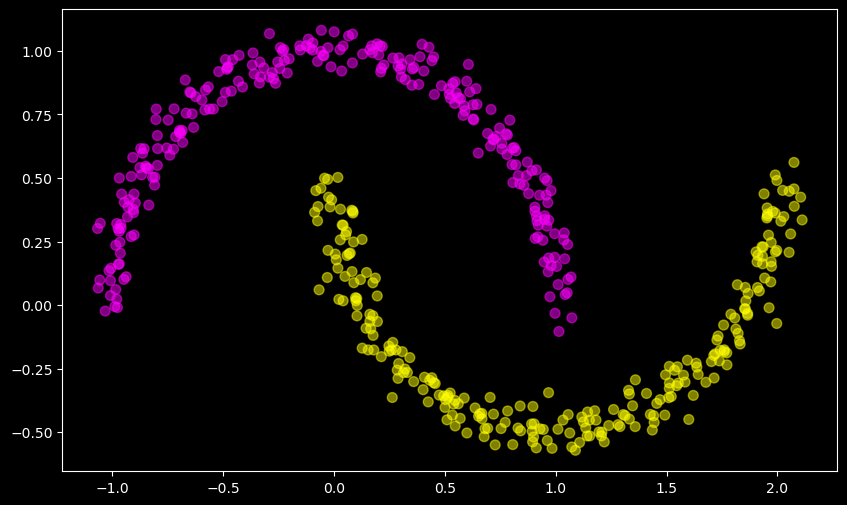

In [6]:
plt. scatter(x[:,0], x[:,1], c = y, s = 50, alpha = 0.5, cmap = 'spring',)

### **Modelo**

1 - Inicialização dos pesos e bias

2 - Feedforward

3 - Calculo da perda

4 - Backpropagation

5 - Fit

In [8]:
class rede:
    def __init__(self,x: np.ndarray, y: np.ndarray,hidden_neurons: int = 10, output_neurons: int = 2):
        np.random.seed(8)
        self.x = x
        self.y = y
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.input_neurons = self.x.shape[1]

        # Inicialização dos pesos e bias
        # Xavier Inicialization -> variancia dos pesos igual em todas as camadas
        self.W1 = np.random.randn(self.input_neurons,self.hidden_neurons) / np.sqrt(self.input_neurons)
        self.B1 = np.zeros((1,self.hidden_neurons))
        self.W2 = np.random.randn(self.hidden_neurons,self.output_neurons) / np.sqrt(self.hidden_neurons)
        self.B2 = np.zeros((1,self.output_neurons))
        self.model_dict = {'W1': self.W1, 'B1': self.B1, 'W2': self.W2, 'B2': self.B2 }
        self.z1 = 0
        self.f1 = 0
        self.z2 = 0
        self.f2 = 0

    def feedforward(self,x: np.ndarray) -> np.ndarray:
        # Equação da reta
        self.z1 = x.dot(self.W1) + self.B1
        
        # Função de ativação (1)
        self.f1 = np.tanh(self.z1)
        
        # Equação da reta
        self.z2 = self.f1.dot(self.W2) + self.B2
        
        # Função de ativação (2)
        self.f2 = np.tanh(self.z2)
        
        # Solftmax
        exp_values = np.exp(self.f2- np.max(self.f2, axis=1, keepdims=True))
        softmax = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return softmax
    def loss(self,softmax):
        # Cross Entropy
        predictions = np.zeros(self.y.shape[0])
        for i, correct_index in enumerate(self.y):
            predicted = softmax[i][correct_index]
            predictions[i] = predicted

        log_prob = -np.log(predicted)
        return log_prob/self.y.shape[0]

    def backpropagation(self):
        pass

    def fit(self):
        pass


modelo = rede(x, y, 10, 2)
softmax = modelo.feedforward(x)
modelo.loss(softmax)

0.0027068159811143196